<a href="https://colab.research.google.com/github/tnqkrghd/NLP/blob/main/Week1_Where_in_the_Genome_Does_DNA_Replication_Begin%3F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Genome replication

* 세포는 분열되기 전에 유전체를 복제하여 2개의 딸 세포 각각에 물려준다.

* 부모 DNA 분자의 두 가닥이 복제 과정에서 풀려나고, 각각의 가닥이 새로운 가닥의 합성을 위한 템플릿처럼 사용된다.

* 알고리즘의 관점으로, 복제를 어떻게 모방할 것인가?

* 복제는 '복제 원점(ori)' 에서 DNA 중합체에 의해 일어난다.

* Finding Origin of Replication Problem:
  - Input: A DNA string Genome.
  - Output: The location of ori in Genome.

* Experimental 방식 vs Computational 방식
  - 후자가 훨씬 빠름
  - 전자의 결과들도 후자적인 분석 없이는 해석될 수 없음
  - ori 를 찾는 computational 한 접근은 없을까?

* what makes this genomic region special in order to design a computational approach for finding ori in other bacteria

*  can you find something that stands out in ori? 

* Hidden Message Problem: Find a “hidden message” in the replication origin.
  - Input: A string Text.
  - Output: A hidden message in Text. 
  - hidden message 가 뭔지에 대한 구체적 명시가 필요함




### 1.2 Hidden Messages in the Replication Origin (Part 1)

**DnaA boxes**

* The region of the bacterial genome encoding ori is typically a few hundred nucleotides long.

* Our plan is to begin with a bacterium in which ori is known, and then determine what makes this genomic region special in order to design a computational approach for finding ori in other bacteria.

In [2]:
# the length of the Vibrio cholerae ori
ori = 'ATCAATGATCAACGTAAGCTTCTAAGCATGATCAAGGTGCTCACACAGTTTATCCACAACCTGAGTGGATGACATCAAGATAGGTCGTTGTATCTCCTTCCTCTCGTACTCTCATGACCACGGAAAGATGATCAAGAGAGGATGATTTCTTGGCCATATCGCAATGAATACTTGTGACTTGTGCTTCCAATTGACATCTTCAGCGCCATATTGCGCTGGCCAAGGTGACGGAGCGGGATTACGAAAGCATGATCATGGCTGTTGTTCTGTTTATCTTGTTTTGACTGAGACTTGTTAGGATAGACGGTTTTTCATCACTGACTAGCCAAAGCCTTACTCTGCCTGACATCGACCGTAAATTGATAATGAATTTACATGCTTCCGCGACGATTTACCTCTTGATCATCGATCCGATTGAAGATCTTCAATTGTTAATTCTCTTGCCTCGACTCATAGCCATGATGAGCTCTTGATCATGTTTCCTTAACCCTCTATTTTTTACGGAAGAATGATCAAGCTGCTGCTCTTGATCATCGTTTC'

print(len(ori))

540


* There must be some “hidden message” in the ori region ordering the cell to begin replication here.

* The initiation of replication is mediated by DnaA, a protein that binds to a short segment within the ori known as a DnaA box. You can think of the DnaA box as a message within the DNA sequence telling DnaA: “bind here!”

* How to find this hidden message without knowing what it looks like in advance — can you find it?

* Hidden Message Problem: Find a “hidden message” in the replication origin.
  - Input: A string Text.
  - Output: A hidden message in Text. 

**Counting Words**

* Operating under the assumption that DNA is a language of its own, see if we can find any surprisingly frequent “words” within the ori of Vibrio cholerae.

* We use the term k-mer for a string of length k and define PatternCount(Pattern, Text) as the number of times that a k-mer Pattern appears as a substring of Text. Following the above example,

- PatternCount("ACAACTATGCATACTATCGGGAACTATCCT", "ACTAT", ) = 3.

In [3]:
def PatternCount(Text, Pattern):
  count = 0
  for i in range(len(Text) - len(Pattern) + 1):
    if Text[i:i+len(Pattern)] == Pattern:
      count += 1
  return count

In [4]:
PatternCount("ACAACTATGCATACTATCGGGAACTATCCT", "ACTAT")

3

In [5]:
# Now, set Text equal to the ori of Vibrio cholerae and Pattern equal to "TGATCA"
Text = "ATCAATGATCAACGTAAGCTTCTAAGCATGATCAAGGTGCTCACACAGTTTATCCACAACCTGAGTGGATGACATCAAGATAGGTCGTTGTATCTCCTTCCTCTCGTACTCTCATGACCACGGAAAGATGATCAAGAGAGGATGATTTCTTGGCCATATCGCAATGAATACTTGTGACTTGTGCTTCCAATTGACATCTTCAGCGCCATATTGCGCTGGCCAAGGTGACGGAGCGGGATTACGAAAGCATGATCATGGCTGTTGTTCTGTTTATCTTGTTTTGACTGAGACTTGTTAGGATAGACGGTTTTTCATCACTGACTAGCCAAAGCCTTACTCTGCCTGACATCGACCGTAAATTGATAATGAATTTACATGCTTCCGCGACGATTTACCTCTTGATCATCGATCCGATTGAAGATCTTCAATTGTTAATTCTCTTGCCTCGACTCATAGCCATGATGAGCTCTTGATCATGTTTCCTTAACCCTCTATTTTTTACGGAAGAATGATCAAGCTGCTGCTCTTGATCATCGTTTC"
Pattern = "TGATCA"

# Finally, print the result of calling PatternCount on Text and Pattern.
result = PatternCount(Text, Pattern)
print(result)

8


### 1.3 Hidden Messages in the Replication Origin (Part 2)

**The Frequent Words Problem**

* We say that Pattern is a most frequent k-mer in Text if it maximizes PatternCount(Pattern, Text) among all k-mers.

* "ATA" is a most frequent 3-mer for Text = "CGATATATCCATAG".

In [9]:
# Exercise Break (1 point): Find the most frequent 2-mer of "GATCCAGATCCCCATAC". 
# (You should solve this exercise by hand.)

text = "GATCCAGATCCCCATAC"

pat = []
for i in range(len(text)-1):
  pat.append(text[i:i+2])

pat

['GA',
 'AT',
 'TC',
 'CC',
 'CA',
 'AG',
 'GA',
 'AT',
 'TC',
 'CC',
 'CC',
 'CC',
 'CA',
 'AT',
 'TA',
 'AC']

In [26]:
count = {}

for i in pat:
  if count.get(i) == None:
    count[i] = 1
  else:
    count[i] +=1

count

{'AC': 1, 'AG': 1, 'AT': 3, 'CA': 2, 'CC': 4, 'GA': 2, 'TA': 1, 'TC': 2}

In [27]:
from collections import Counter

Counter(pat).most_common()

[('CC', 4),
 ('AT', 3),
 ('GA', 2),
 ('TC', 2),
 ('CA', 2),
 ('AG', 1),
 ('TA', 1),
 ('AC', 1)]

* Frequent Words Problem:  Find the most frequent k-mers in a string.
  - Input: A string Text and an integer k
  - Output: All most frequent k-mers in Text.

* To find the most frequent k-mers in a string Text, we would like to create a mapping like the example below for Text = "CGATATATCCATAG" and k = 3, where we map each k-mer appearing in  Text to its number of occurrences in  Text.  

* We call this structure a frequency map; once we have constructed a frequency map for  Text and k, we will be able to find the most frequent word  by finding the k-mer whose number of occurrences achieves a maximum.

In [28]:
def FrequencyMap(Text, k):
    freq = {}
    n = len(Text)
    for i in range(n-k+1):
        Pattern = Text[i:i+k]
        freq[Pattern] = freq.get(Pattern, 0) + 1
    return freq

In [29]:
FrequencyMap('CGATATATCCATAG', 3)

{'ATA': 3,
 'ATC': 1,
 'CAT': 1,
 'CCA': 1,
 'CGA': 1,
 'GAT': 1,
 'TAG': 1,
 'TAT': 2,
 'TCC': 1}

In [30]:
count.values()

dict_values([2, 3, 2, 4, 2, 1, 1, 1])

In [31]:
def FrequentWords(Text, k):
  words = []
  freq = FrequencyMap(Text, k)
  m = max(freq.values())
  for key in freq:
    if freq[key] == m:
      words.append(key)
  return words

In [32]:
FrequentWords('ACGTTGCATGTCGCATGATGCATGAGAGCT', 4)

['GCAT', 'CATG']

In [33]:
# Exercise Break (1 point): Apply your solution to the Frequent Words Problem if Text is the oriC of Vibrio cholerae (click here to download) and k = 10. 
# What are the most frequent words?

Vibrio_cholerae = 'ATCAATGATCAACGTAAGCTTCTAAGCATGATCAAGGTGCTCACACAGTTTATCCACAACCTGAGTGGATGACATCAAGATAGGTCGTTGTATCTCCTTCCTCTCGTACTCTCATGACCACGGAAAGATGATCAAGAGAGGATGATTTCTTGGCCATATCGCAATGAATACTTGTGACTTGTGCTTCCAATTGACATCTTCAGCGCCATATTGCGCTGGCCAAGGTGACGGAGCGGGATTACGAAAGCATGATCATGGCTGTTGTTCTGTTTATCTTGTTTTGACTGAGACTTGTTAGGATAGACGGTTTTTCATCACTGACTAGCCAAAGCCTTACTCTGCCTGACATCGACCGTAAATTGATAATGAATTTACATGCTTCCGCGACGATTTACCTCTTGATCATCGATCCGATTGAAGATCTTCAATTGTTAATTCTCTTGCCTCGACTCATAGCCATGATGAGCTCTTGATCATGTTTCCTTAACCCTCTATTTTTTACGGAAGAATGATCAAGCTGCTGCTCTTGATCATCGTTTC'

FrequentWords(Vibrio_cholerae, 10)

['CTCTTGATCA', 'TCTTGATCAT']

**Frequent words in Vibrio cholerae**


  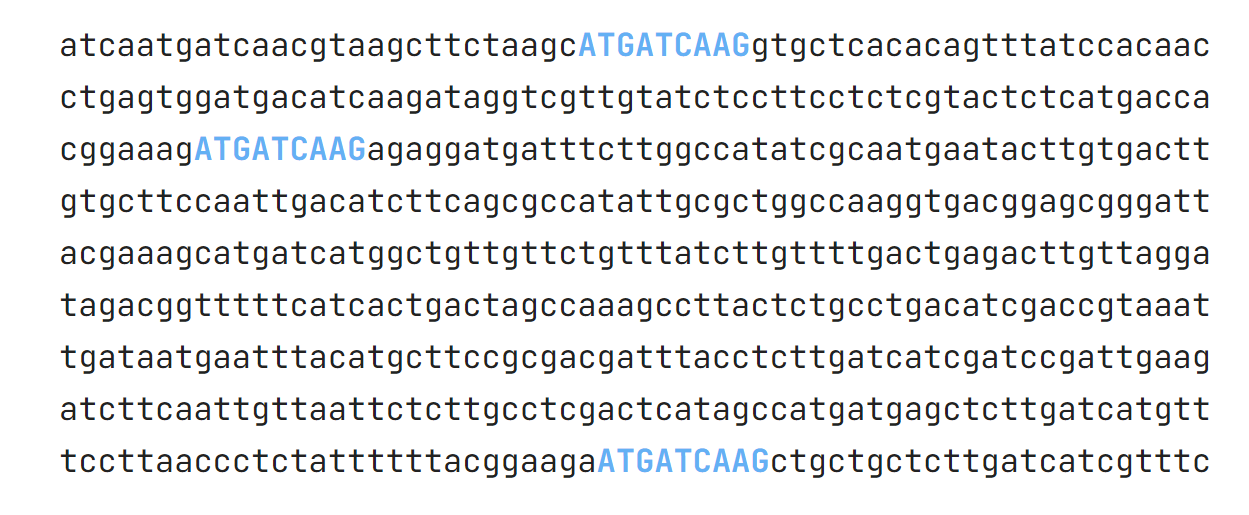





* We highlight a most frequent 9-mer instead of using some other value of k because experiments have revealed that bacterial DnaA boxes are usually 9 nucleotides long.

* In fact, there are four different 9-mers repeated three or more times in this region: "ATGATCAAG", "CTTGATCAT", "TCTTGATCA", and "CTCTTGATC".

* The low likelihood of witnessing even one repeated 9-mer in the ori region of Vibrio cholerae leads us to the working hypothesis that one of these four 9-mers may represent a potential DnaA box that, when appearing multiple times in a short region, jump-starts replication. But which one?

### 1.4 Some Hidden Messages are More Surprising than Others

* Nucleotides A and T are complements of each other, as are C and G.

* The figure below shows a template strand "AGTCGCATAGT" and its complementary strand "ACTATGCGACT".

* The beginning and end of a DNA strand are denoted 5’and 3’, respectively. Each DNA strand is read in the 5' → 3' direction, and the complementary strand runs in the opposite direction to the template strand.

    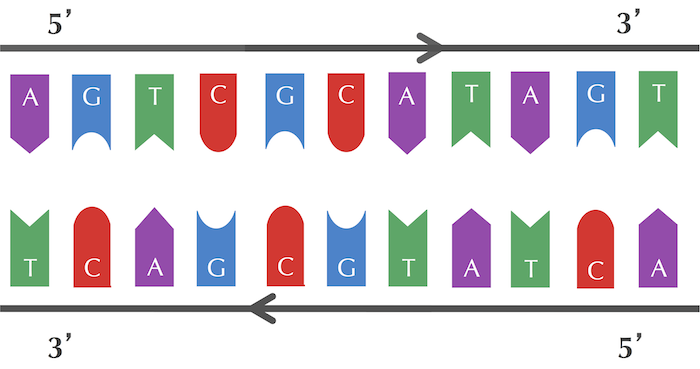

* Reverse Complement Problem: Find the reverse complement of a DNA string.
  - Input: A DNA string Pattern.
  - Output: The reverse complement of Pattern.

* For example, the reverse complement of "AGTCGCATAGT" is "ACTATGCGACT".

In [19]:
# top-down programming
# ReverseComplement -> Reverse / Complement

def ReverseComplement(Pattern):
  Pattern = Reverse(Pattern)
  Pattern = Complement(Pattern)

  return Pattern

In [34]:
def Reverse(Pattern):
  string = ""
  for x in Pattern:
    string = x + string 
  
  return string

Reverse('apple')

'elppa'

In [35]:
def Complement(Pattern):
  string = ""
  for x in Pattern:
    if x == "A":
      string += "T"
    elif x == "C":
      string += "G"
    elif x == "G":
      string += "C"
    else:
      string += "A"
  return string

Complement("AAAACCCGGT")

'TTTTGGGCCA'

In [36]:
def Complement_dict(Pattern):
  pairs = {"A":"T", "G":"C", "T":"A", "C":"G"}
  string = ""

  for x in Pattern:
    string += pairs.get(x)
  return string

Complement_dict("AAAACCCGGT")

'TTTTGGGCCA'

* Interestingly, among the four most frequent 9-mers in the ori region of Vibrio cholerae, "ATGATCAAG" and "CTTGATCAT" are reverse complements of each other, resulting in the following six occurrences of these strings.

  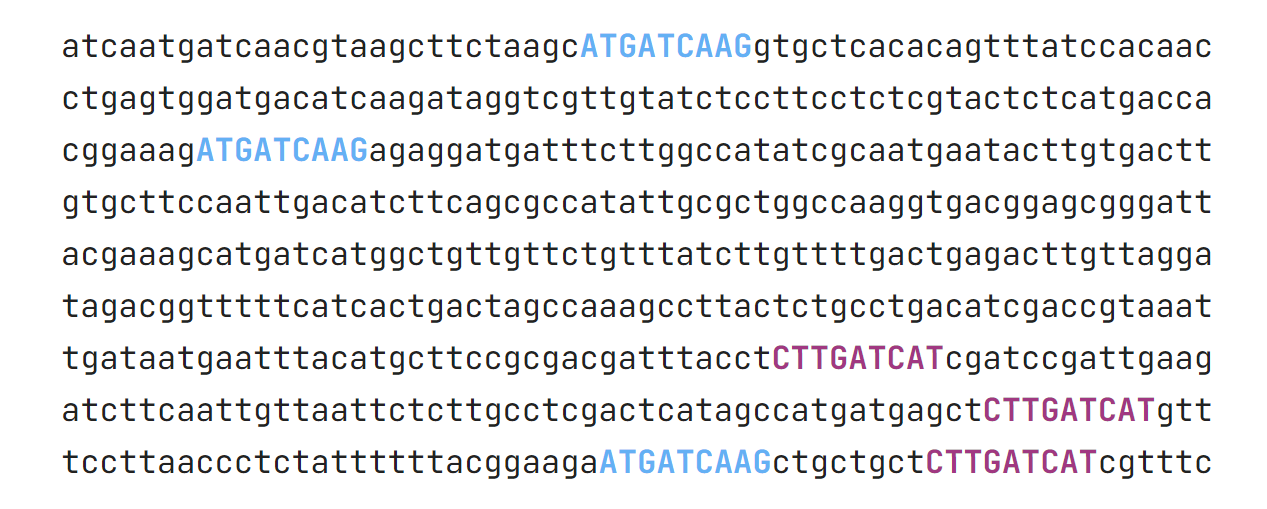
  
* Finding a 9-mer that appears six or more times (either as itself or as its reverse complement) in a DNA string of length 500 is far more surprising than finding a 9-mer that appears three or more times alone. 

* This statistical evidence leads us to the working hypothesis that "ATGATCAAG" and its reverse complement "CTTGATCAT" indeed represent DnaA boxes in Vibrio cholerae.

* Before concluding that we have found the DnaA box of Vibrio cholerae, the careful bioinformatician should check if there are other short regions in the Vibrio cholerae genome with multiple occurrences of "ATGATCAAG" (or "CTTGATCAT"). 

* After all, maybe these strings occur as repeats throughout the entire Vibrio cholerae genome, rather than just in the ori region.

* Pattern Matching Problem: Find all occurrences of a pattern in a string.
  - Input: Strings Pattern and Genome
  - Output: All starting positions in Genome where Pattern appears as a substring.

In [23]:
def PatternMatching(Pattern, Genome):
  positions = []
  k = len(Pattern)
  n = len(Genome)

  for i in range(n-k+1):
    pat = Genome[i:i+k]
    if pat == Pattern:
      positions.append(i)

  return positions

In [24]:
PatternMatching("ATAT", "GATATATGCATATACTT")

[1, 3, 9]

* After solving the Pattern Matching Problem, we discover that "ATGATCAAG" appears 17 times in the following positions of the Vibrio cholerae genome:

  - 116556, 149355, **151913, 152013, 152394**, 186189, 194276, 200076, 224527,
307692, 479770, 610980, 653338, 679985, 768828, 878903, 985368

* With the exception of the three occurrences of "ATGATCAAG" in ori at starting positions 151913, 152013, and 152394, no other instances of "ATGATCAAG" form “clumps”, i.e., appear close to each other in a small region of the genome.

* We now have strong statistical evidence that "ATGATCAAG"/"CTTGATCAT" may represent the hidden message to DnaA to start replication.



### 1.5 An Explosion of Hidden Messages

* We should not jump to the conclusion that "ATGATCAAG"/"CTTGATCAT" is a hidden message for all bacterial genomes without checking.

* Let’s check the proposed ori region of *Thermotoga petrophila*.

In [37]:
# Copy your PatternCount function below here
def PatternCount(Text, Pattern):
  count = 0
  for i in range(len(Text) - len(Pattern) + 1):
    if Text[i:i+len(Pattern)] == Pattern:
      count += 1
  return count

# On the following line, create a variable called Text that is equal to the oriC region from T petrophila
Text = "AACTCTATACCTCCTTTTTGTCGAATTTGTGTGATTTATAGAGAAAATCTTATTAACTGAAACTAAAATGGTAGGTTTGGTGGTAGGTTTTGTGTACATTTTGTAGTATCTGATTTTTAATTACATACCGTATATTGTATTAAATTGACGAACAATTGCATGGAATTGAATATATGCAAAACAAACCTACCACCAAACTCTGTATTGACCATTTTAGGACAACTTCAGGGTGGTAGGTTTCTGAAGCTCTCATCAATAGACTATTTTAGTCTTTACAAACAATATTACCGTTCAGATTCAAGATTCTACAACGCTGTTTTAATGGGCGTTGCAGAAAACTTACCACCTAAAATCCAGTATCCAAGCCGATTTCAGAGAAACCTACCACTTACCTACCACTTACCTACCACCCGGGTGGTAAGTTGCAGACATTATTAAAAACCTCATCAGAAGCTTGTTCAAAAATTTCAATACTCGAAACCTACCACCTGCGTCCCCTATTATTTACTACTACTAATAATAGCAGTATAATTGATCTGA"


# On the following line, create a variable called count_1 that is equal to the number of times
# that "ATGATCAAG" occurs in Text.
count1 = PatternCount(Text, "ATGATCAAG")


# On the following line, create a variable called count_2 that is equal to the number of times
# that "CTTGATCAT" occurs in Text. 
count2 = PatternCount(Text, "CTTGATCAT")



# Finally, print the sum of count_1 and count_2
print(count1+count2)

0


* This region does not contain a single occurrence of "ATGATCAAG" or "CTTGATCAT"! Thus, different bacteria may use different DnaA boxes as “hidden messages” to the DnaA protein.

* Application of the Frequent Words Problem to the ori region above reveals that the following six 9-mers appear in this region three or more times:

  - "AACCTACCA"  "AAACCTACC"  "ACCTACCAC"
  - "CCTACCACC"  "GGTAGGTTT"  "TGGTAGGTT"

* Something peculiar must be happening because it is extremely unlikely that six different 9-mers will occur so frequently within the same short region in a random string.

* Ori-Finder(a software tool for finding ori) chooses "CCTACCACC" (along with its reverse complement "GGTGGTAGG") as a working hypothesis for the DnaA box in Thermotoga petrophila. These two complementary 9-mers appear five times in the replication origin:

  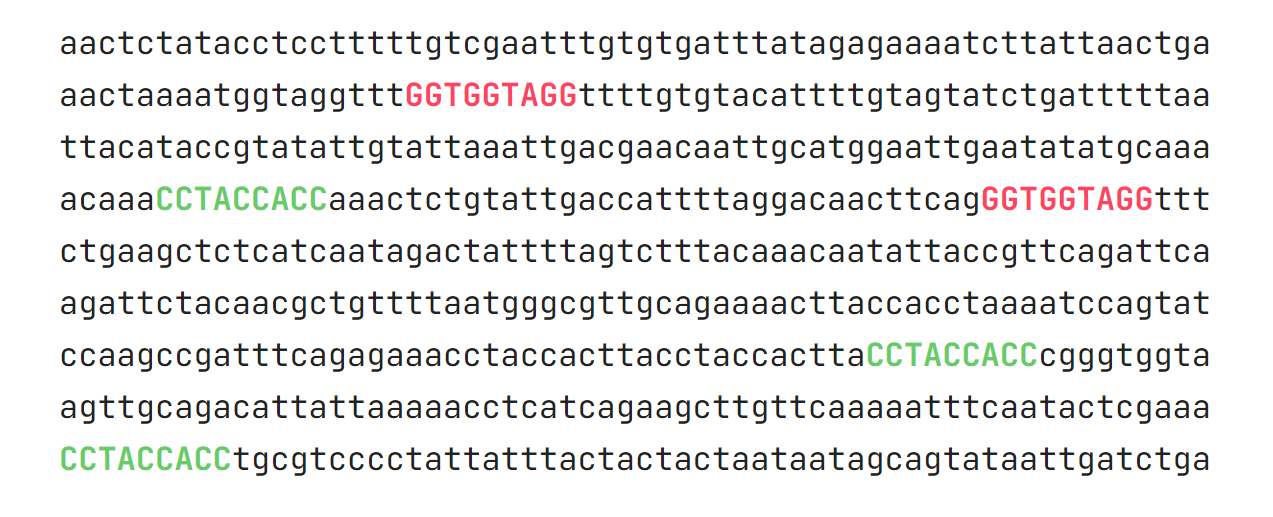

**The Clump Finding Problem**

* Instead of finding clumps of a specific k-mer, let’s try to find every k-mer that forms a clump in the genome. Hopefully, the locations of these clumps will shed light on the location of ori.

* Given integers L and t, a k-mer Pattern forms an (L, t)-clump inside a (longer) string Genome if there is an interval of Genome of length L in which this k-mer appears at least t times.

* For example, "TGCA" forms a (25, 3)-clump in the following Genome:

  - gatcagcataagggtccCTGCAATGCATGACAAGCCTGCAGTtgttttac

* Clump Finding Problem:  Find patterns forming clumps in a string.
  - Input: A string Genome, and integers k, L, and t.
  - Output: All distinct k-mers forming (L, t)-clumps in Genome.

* When we used this algorithm to look for clumps in the Escherichia coli (E. coli) genome, we found hundreds of different 9-mers forming (500, 3)-clumps in this genome. It is absolutely unclear which of these 9-mers might represent a DnaA box in the bacterium’s ori region.

* Should we give up? If not, what would you do now?